In [1]:
 import math
import pandas as pd




In [2]:
Test = pd.read_csv(r'C:\Users\lenovo\Downloads\UNSW_NB15_training-set.csv.zip')
Train = pd.read_csv(r'C:\Users\lenovo\Downloads\UNSW_NB15_testing-set.csv.zip')

In [3]:
set(Train["attack_cat"])

{'Analysis',
 'Backdoor',
 'DoS',
 'Exploits',
 'Fuzzers',
 'Generic',
 'Normal',
 'Reconnaissance',
 'Shellcode',
 'Worms'}

In [4]:
set(Train["label"])

{0, 1}

In [5]:
Train=Train.drop("attack_cat",axis=1)

Test=Test.drop("attack_cat",axis=1)

print(Train.shape, Test.shape)

(175341, 44) (82332, 44)


In [6]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [7]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

<Axes: xlabel='label', ylabel='count'>

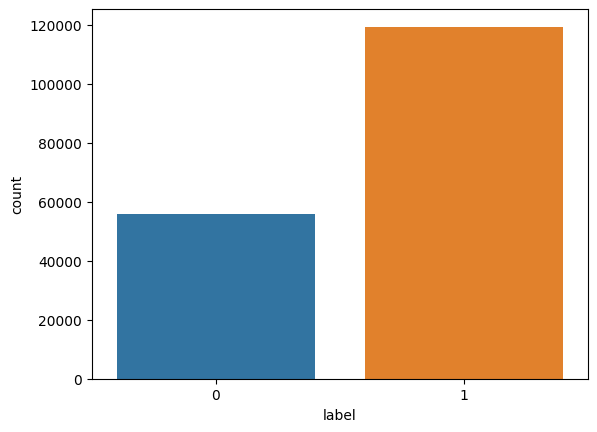

In [8]:

import seaborn as sns
sns.countplot(x=Train['label'])

<Axes: xlabel='label', ylabel='count'>

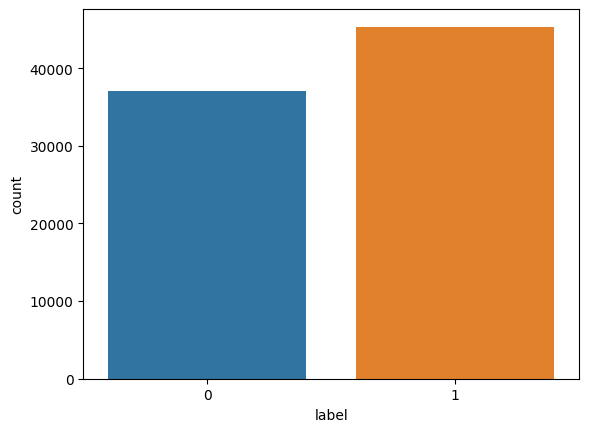

In [9]:
sns.countplot(x=Test['label'])

In [10]:
set(Train['proto'])

{'3pc',
 'a/n',
 'aes-sp3-d',
 'any',
 'argus',
 'aris',
 'arp',
 'ax.25',
 'bbn-rcc',
 'bna',
 'br-sat-mon',
 'cbt',
 'cftp',
 'chaos',
 'compaq-peer',
 'cphb',
 'cpnx',
 'crtp',
 'crudp',
 'dcn',
 'ddp',
 'ddx',
 'dgp',
 'egp',
 'eigrp',
 'emcon',
 'encap',
 'etherip',
 'fc',
 'fire',
 'ggp',
 'gmtp',
 'gre',
 'hmp',
 'i-nlsp',
 'iatp',
 'ib',
 'icmp',
 'idpr',
 'idpr-cmtp',
 'idrp',
 'ifmp',
 'igmp',
 'igp',
 'il',
 'ip',
 'ipcomp',
 'ipcv',
 'ipip',
 'iplt',
 'ipnip',
 'ippc',
 'ipv6',
 'ipv6-frag',
 'ipv6-no',
 'ipv6-opts',
 'ipv6-route',
 'ipx-n-ip',
 'irtp',
 'isis',
 'iso-ip',
 'iso-tp4',
 'kryptolan',
 'l2tp',
 'larp',
 'leaf-1',
 'leaf-2',
 'merit-inp',
 'mfe-nsp',
 'mhrp',
 'micp',
 'mobile',
 'mtp',
 'mux',
 'narp',
 'netblt',
 'nsfnet-igp',
 'nvp',
 'ospf',
 'pgm',
 'pim',
 'pipe',
 'pnni',
 'pri-enc',
 'prm',
 'ptp',
 'pup',
 'pvp',
 'qnx',
 'rdp',
 'rsvp',
 'rtp',
 'rvd',
 'sat-expak',
 'sat-mon',
 'sccopmce',
 'scps',
 'sctp',
 'sdrp',
 'secure-vmtp',
 'sep',
 'skip',
 

In [11]:
import pandas as pd

# Assuming you have a DataFrame called 'df' with columns 'proto', 'service', and 'state'
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply label encoding to 'proto' column
Train['proto_e'] = label_encoder.fit_transform(Train['proto'])

# Apply label encoding to 'service' column
Train['service_e'] = label_encoder.fit_transform(Train['service'])

# Apply label encoding to 'state' column
Train['state_e'] = label_encoder.fit_transform(Train['state'])

# Drop the original columns
Train.drop(columns=['proto', 'service', 'state'], inplace=True)

In [12]:

import pandas as pd

# Assuming you have a DataFrame called 'df' with columns 'proto', 'service', and 'state'
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply label encoding to 'proto' column
Test['proto_e'] = label_encoder.fit_transform(Test['proto'])

# Apply label encoding to 'service' column
Test['service_e'] = label_encoder.fit_transform(Test['service'])

# Apply label encoding to 'state' column
Test['state_e'] = label_encoder.fit_transform(Test['state'])
# Drop the original columns
Test.drop(columns=['proto', 'service', 'state'], inplace=True)

In [13]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   spkts              175341 non-null  int64  
 3   dpkts              175341 non-null  int64  
 4   sbytes             175341 non-null  int64  
 5   dbytes             175341 non-null  int64  
 6   rate               175341 non-null  float64
 7   sttl               175341 non-null  int64  
 8   dttl               175341 non-null  int64  
 9   sload              175341 non-null  float64
 10  dload              175341 non-null  float64
 11  sloss              175341 non-null  int64  
 12  dloss              175341 non-null  int64  
 13  sinpkt             175341 non-null  float64
 14  dinpkt             175341 non-null  float64
 15  sjit               175341 non-null  float64
 16  dj

In [14]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   spkts              82332 non-null  int64  
 3   dpkts              82332 non-null  int64  
 4   sbytes             82332 non-null  int64  
 5   dbytes             82332 non-null  int64  
 6   rate               82332 non-null  float64
 7   sttl               82332 non-null  int64  
 8   dttl               82332 non-null  int64  
 9   sload              82332 non-null  float64
 10  dload              82332 non-null  float64
 11  sloss              82332 non-null  int64  
 12  dloss              82332 non-null  int64  
 13  sinpkt             82332 non-null  float64
 14  dinpkt             82332 non-null  float64
 15  sjit               82332 non-null  float64
 16  djit               823

In [15]:
x_train=Train.drop(['label'],axis=1)
y_train=Train['label']

In [16]:
x_test=Test.drop(['label'],axis=1)
y_test=Test['label']

In [17]:
x_test.shape

(82332, 43)

In [18]:
y_train

0         0
1         0
2         0
3         0
4         0
         ..
175336    1
175337    1
175338    1
175339    1
175340    1
Name: label, Length: 175341, dtype: int64

In [19]:
# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# define min max scaler
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

print(x_train)

[[-1.73204093 -0.19102881 -0.10445581 ...  0.15180939 -0.70230738
  -0.40921807]
 [-1.73202117 -0.10948479 -0.04601353 ...  0.15180939 -0.70230738
  -0.40921807]
 [-1.73200142  0.04069922 -0.08984524 ...  0.15180939 -0.70230738
  -0.40921807]
 ...
 [ 1.73200142 -0.20977336 -0.13367695 ...  0.42023529  0.16531734
   0.7429361 ]
 [ 1.73202117 -0.20977336 -0.13367695 ...  0.42023529  0.16531734
   0.7429361 ]
 [ 1.73204093 -0.20977336 -0.13367695 ...  0.42023529  0.16531734
   0.7429361 ]]


In [20]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(175341, 43) (82332, 43) (175341,) (82332,)


In [21]:
import numpy as np
x_train=np.concatenate((x_train, x_test))
y_train=np.concatenate((y_train, y_test))

since the encoder model uses dilated convo layers which requires in 3D shape of input data to fit the model or train the model ,or else 2D enough. To do so below steps requires.

In [22]:
x_train.shape

(257673, 43)

In [23]:
from tensorflow.keras.layers import Input, Conv2D, GlobalAveragePooling2D, Dense, Softmax, Reshape, Multiply, Add, Concatenate, Flatten

In [24]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, GlobalAveragePooling2D, Dense, Softmax, Reshape, Multiply, Add, Concatenate, Flatten
from tensorflow.keras.models import Model

num_samples, num_features = x_train.shape

inp = Input(shape=(num_samples,num_features, 1))  # Adjust input shape for Conv2D

class ChannelAttention(tf.keras.layers.Layer):
    def __init__(self, reduction=16):
        super(ChannelAttention, self).__init__()
        self.reduction = reduction
        self.avg_pool = GlobalAveragePooling2D(data_format='channels_last')  # Update data format
        self.fc = Dense(1, activation='relu')  # Use 1 output unit for channel attention
        self.sigmoid = tf.keras.layers.Activation('sigmoid')

    def call(self, x):
        y = self.avg_pool(x)
        y = self.fc(y)
        y = self.sigmoid(y)
        y = tf.expand_dims(y, axis=1)  # Add an axis for channels (updated axis=1)
        y = tf.expand_dims(y, axis=1)  # Add another axis for broadcasting
        return x * y



# Define Positional Self-Attention module
class PositionalSelfAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(PositionalSelfAttention, self).__init__()
        self.d_model = d_model
        self.num_heads = num_heads
        self.head_dim = d_model // num_heads

    def build(self, input_shape):
        self.query = tf.keras.layers.Dense(self.d_model)
        self.key = tf.keras.layers.Dense(self.d_model)
        self.value = tf.keras.layers.Dense(self.d_model)

    def call(self, inputs):
        # Split the input into query, key, and value
        query = self.query(inputs)
        key = self.key(inputs)
        value = self.value(inputs)

        # Reshape query, key, and value for multi-head attention
        query = tf.reshape(query, [-1, self.num_heads, self.head_dim])
        key = tf.reshape(key, [-1, self.num_heads, self.head_dim])
        value = tf.reshape(value, [-1, self.num_heads, self.head_dim])

        # Compute attention scores
        scores = tf.matmul(query, key, transpose_b=True)
        scores = scores / tf.math.sqrt(tf.cast(self.head_dim, tf.float32))

        # Apply softmax activation to get attention probabilities
        attention_probs = tf.nn.softmax(scores, axis=-1)

        # Compute attention-weighted sum of value vectors
        attention_output = tf.matmul(attention_probs, value)
        attention_output = tf.reshape(attention_output, [-1, self.d_model])

        return attention_output

# Long-Range Feature Extractor with Dilated Convolution
long_range_feature_extractor_dilated = Conv2D(filters=128, kernel_size=(3, 3), padding='same', dilation_rate=3, activation='relu')(inp)
long_range_feature_extractor_dilated = Conv2D(filters=64, kernel_size=(3, 3), padding='same', dilation_rate=3, activation='relu')(long_range_feature_extractor_dilated)
long_range_feature_extractor_dilated = Conv2D(filters=32, kernel_size=(3, 3), padding='same', dilation_rate=3, activation='relu')(long_range_feature_extractor_dilated)
long_range_feature_extractor_dilated = ChannelAttention(32)(long_range_feature_extractor_dilated)


# Local Feature Extractor with Standard Convolution
local_feature_extractor_standard = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(inp)
local_feature_extractor_standard = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(local_feature_extractor_standard)
local_feature_extractor_standard = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(local_feature_extractor_standard)
local_feature_extractor_standard = PositionalSelfAttention(32, num_heads=4)(local_feature_extractor_standard)

x1_reshaped = tf.reshape(long_range_feature_extractor_dilated, [-1,num_samples,32])
x2_reshaped = tf.reshape(local_feature_extractor_standard, [-1,num_samples,32])


# Concatenate features from both extractors
encoded_output1 = tf.add(local_feature_extractor_standard, long_range_feature_extractor_dilated)



# Create the encoder model for decoder
encoder_d = Model(inp, encoded_output1)

# Print the summary of the encoder
encoder_d.summary()

from tensorflow.keras.layers import Conv2DTranspose, Reshape

encoder_output = encoder_d(inp)
# Reshape the encoder output to match the desired decoder input shape
#reshaped_encoder_output = Reshape((num_samples, num_features, 32, 1))(encoder_output)

# Define the decoder architecture
def create_decoder(encoder_output):
    # Decoder 1
    x = Conv2DTranspose(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(encoder_output)
    # Add more decoder layers as needed
    x = Conv2DTranspose(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2DTranspose(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2DTranspose(filters=256, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2DTranspose(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2DTranspose(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = Conv2DTranspose(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(x)
    # Final layer
    decoded_output = Conv2DTranspose(filters=1, kernel_size=(3, 3), padding='same', activation='sigmoid')(x)
    return decoded_output

decoder_output = create_decoder(encoder_output)

decoder = Model(inputs=inp, outputs=decoder_output)

# Print the summary of the decoder
decoder.summary()
# Create the autoencoder model
autoencoder_model = Model(inputs=inp, outputs=decoder_output)

# Compile the autoencoder
autoencoder_model.compile(optimizer='adam', loss='mean_squared_error')

# Print the summary of the autoencoder
autoencoder_model.summary()

#ram crashing so no need as the model is done with encoder part only
# Reshape x_train to match the input shape of the autoencoder
#x_train_reshaped = x_train.reshape((-1, num_samples, num_features, 1))

# Fit the autoencoder to the x_train data
#autoencoder_model.fit(x_train_reshaped, x_train_reshaped, batch_size=32, epochs=10)



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 257673, 43, 1)]      0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 257673, 43, 128)      1280      ['input_1[0][0]']             
                                                                                                  
 conv2d (Conv2D)             (None, 257673, 43, 128)      1280      ['input_1[0][0]']             
                                                                                                  
 conv2d_4 (Conv2D)           (None, 257673, 43, 64)       73792     ['conv2d_3[0][0]']            
                                                                                              

run this in think since it is crashing the ram

In [25]:
#since the ram is unable proceed with above encoder_d i haev created another encoder by reshaping so the encoder model can encode the x data easily.

x1_reshaped = tf.reshape(long_range_feature_extractor_dilated, [-1,num_samples,32])
x2_reshaped = tf.reshape(local_feature_extractor_standard, [-1,num_samples,32])
# Concatenate features from both extractors
encoded_output = tf.add(x1_reshaped, x2_reshaped)



# Create the encoder model for decoder
encoder = Model(inp, encoded_output)

# Print the summary of the encoder
encoder.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 257673, 43, 1)]      0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 257673, 43, 128)      1280      ['input_1[0][0]']             
                                                                                                  
 conv2d_3 (Conv2D)           (None, 257673, 43, 128)      1280      ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 257673, 43, 64)       73792     ['conv2d[0][0]']              
                                                                                            

In [26]:
import numpy as np
x_train_expanded=np.expand_dims(x_train,axis=0)
encoded_x_train=encoder.predict(x_train_expanded)

1/1 [==============================] - 34s 34s/step


In [27]:
print('encoded_x_train.shape',encoded_x_train.shape)
print('y_train.shape',y_train.shape)

encoded_x_train.shape (43, 257673, 32)
y_train.shape (257673,)


In [28]:
x_train=encoded_x_train.reshape(encoded_x_train.shape[1],-1)

In [29]:
print('x_train.shape',x_train.shape)
print('y_train.shape',y_train.shape)

x_train.shape (257673, 1376)
y_train.shape (257673,)


In [30]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming you have x_train and y_train datasets

# Define the ratio of validation data
validation_ratio = 0.325# You can adjust this based on your needs

# Split the data into training and validation sets
x_train1, x_val, y_train1, y_val = train_test_split(x_train, y_train, test_size=validation_ratio, random_state=42)

# Now you have separate x_train, y_train (for training) and x_val, y_val (for validation)


In [31]:
x_train1.shape

(173929, 1376)

In [43]:

import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score


# Define the classifier model
inp = Input(shape=(x_train1.shape[1],))
x = Dense(128, activation='relu')(inp)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

# Create the classifier model
classifier_model = Model(inputs=inp, outputs=output)

# Compile the model
classifier_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the classifier
history=classifier_model.fit(x_train1, y_train1, epochs=40, batch_size=32,validation_data=(x_val,y_val))




Epoch 1/40
5436/5436 [==============================] - 17s 3ms/step - loss: 0.1065 - accuracy: 0.9608 - val_loss: 0.0882 - val_accuracy: 0.9695
Epoch 2/40
5436/5436 [==============================] - 16s 3ms/step - loss: 0.0742 - accuracy: 0.9724 - val_loss: 0.0706 - val_accuracy: 0.9736
Epoch 3/40
5436/5436 [==============================] - 15s 3ms/step - loss: 0.0650 - accuracy: 0.9751 - val_loss: 0.0689 - val_accuracy: 0.9737
Epoch 4/40
5436/5436 [==============================] - 15s 3ms/step - loss: 0.0592 - accuracy: 0.9774 - val_loss: 0.0652 - val_accuracy: 0.9755
Epoch 5/40
5436/5436 [==============================] - 15s 3ms/step - loss: 0.0544 - accuracy: 0.9792 - val_loss: 0.0640 - val_accuracy: 0.9772
Epoch 6/40
5436/5436 [==============================] - 15s 3ms/step - loss: 0.0505 - accuracy: 0.9805 - val_loss: 0.0627 - val_accuracy: 0.9778
Epoch 7/40
5436/5436 [==============================] - 15s 3ms/step - loss: 0.0477 - accuracy: 0.9818 - val_loss: 0.0575 - val_ac

In [50]:
# Evaluate the classifier on the validation set
val_predictions = classifier_model.predict(x_train1)
val_predictions_binary = (val_predictions > 0.5).astype(int)
accuracy = accuracy_score(y_train1,val_predictions_binary)

# Print the accuracy
print("Accuracy on training set:", accuracy)

5436/5436 [==============================] - 9s 2ms/step
Accuracy on training set: 0.998056678299766


In [51]:
# Evaluate the classifier on the validation set
val_predictions = classifier_model.predict(x_val)
val_predictions_binary = (val_predictions > 0.5).astype(int)
accuracy = accuracy_score(y_val,val_predictions_binary)

# Print the accuracy
print("Accuracy on validation set:", accuracy)

2617/2617 [==============================] - 4s 2ms/step
Accuracy on validation set: 0.9790432747420711


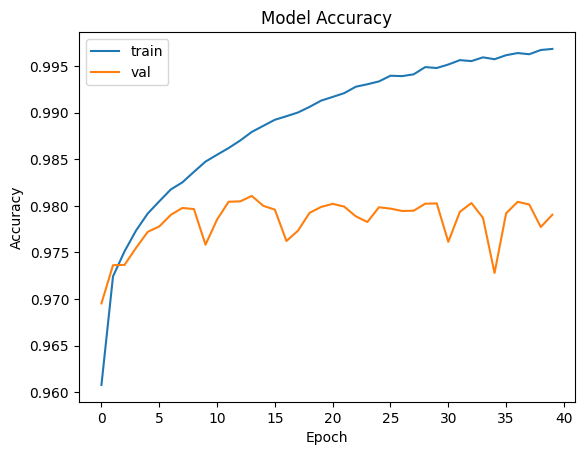

In [52]:
import matplotlib.pyplot as plt

# Assuming you have the model's history stored in a variable called "history"
# Replace this with the actual history object returned from model.fit()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [56]:
from sklearn.metrics import precision_score, recall_score,confusion_matrix


# Assuming you have the model's predictions stored in a variable called "predictions"
# Replace this with your actual model predictions
predictions = classifier_model.predict(x_train1)

# Convert the predicted probabilities to binary predictions
# Assuming a threshold of 0.5 for binary classification
binary_predictions = (predictions > 0.5).astype(int)

# Assuming you have the ground truth labels for the test data in a variable called "y_test"
# Replace this with your actual ground truth labels
# Assuming binary classification with 0 and 1 labels
y_train_binary = (y_train1 > 0.5).astype(int)

# Compute precision and recall
precision = precision_score(y_train_binary, binary_predictions)
recall = recall_score(y_train_binary, binary_predictions)
conf_matrix = confusion_matrix(y_train_binary, binary_predictions)

print("Confusion Matrix:",conf_matrix)
print("Precision:", precision)
print("Recall:", recall)


5436/5436 [==============================] - 9s 2ms/step
Confusion Matrix: [[ 62624     98]
 [   240 110967]]
Precision: 0.9991176338180345
Recall: 0.997841862472686


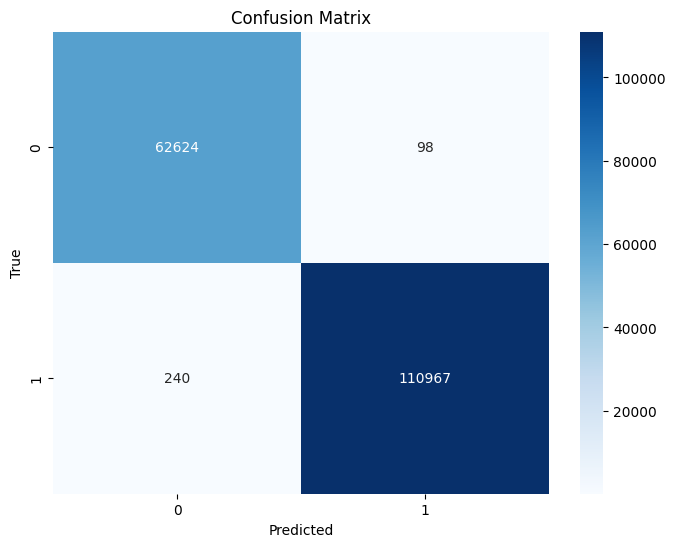

In [54]:
import seaborn as sns

# Assuming you have the confusion matrix stored in a variable called "conf_matrix"
# Replace this with the actual confusion matrix calculated earlier
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [55]:
import numpy as np

# Assuming x_train_squeezed is a NumPy array
x = x_train1[1, :]

# Assuming x has shape (seq_length,) where seq_length is the number of time steps
# Reshape x to have shape (1, seq_length) to match the input shape of the Dense layer
x = x.reshape(1, -1)

# Your remaining code goes here
yp = classifier_model.predict(x)

# Assuming the model output shape is (batch_size, num_classes)
# Select the first five predictions and flatten them to a 1D array
predictions = yp[0][:5]

# Define the threshold for anomaly detection (you may need to tune this value)
threshold = 1

# Check if any of the first five predictions exceed the threshold
if np.any(predictions >= threshold):
    print("Intrusion Detected!")
else:
    print("Normal")


1/1 [==============================] - 0s 18ms/step
Normal
